<a href="https://colab.research.google.com/github/ujwala123rekha/expense_tracker/blob/main/medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are using the Medical Cost Personal Datasets
Insurance Forecast by using Linear Regression dataset
Link : https://www.kaggle.com/datasets/mirichoi0218/insurance


In [46]:
import pandas as pd

In [48]:
#First checking for the feature names
df = pd.read_csv('insurance.csv')
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


From this we will try to understand/analyse the data

In [49]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [50]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [11]:
df.isnull().count()


,0
age,1338
sex,1338
bmi,1338
children,1338
smoker,1338
region,1338
charges,1338


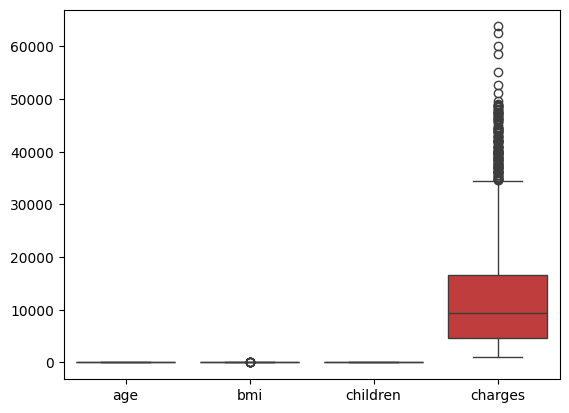

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[['age','bmi','children','charges']])
plt.show()

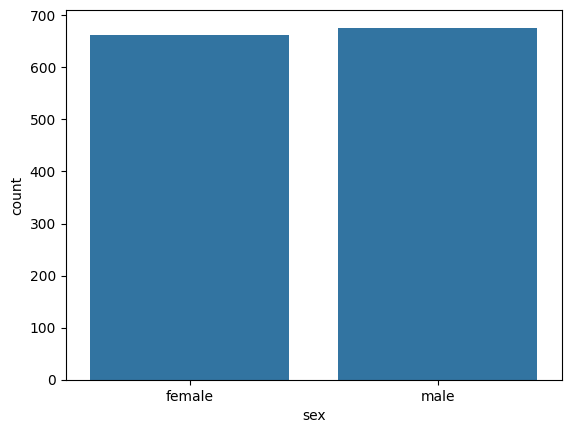

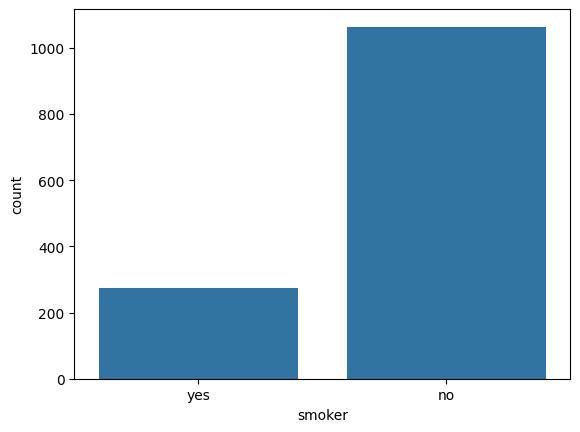

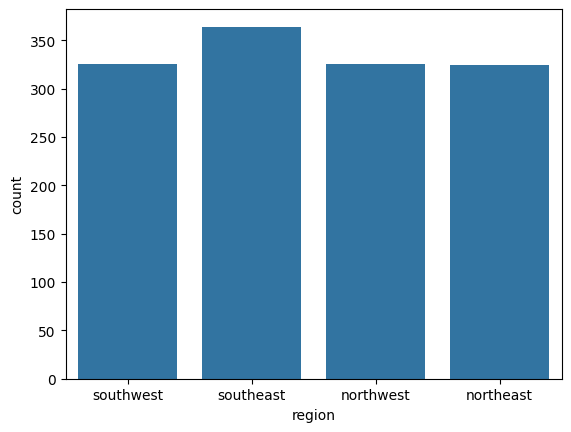

In [15]:
categorical_cols = ['sex','smoker','region']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()

It explains that this is not totally linear

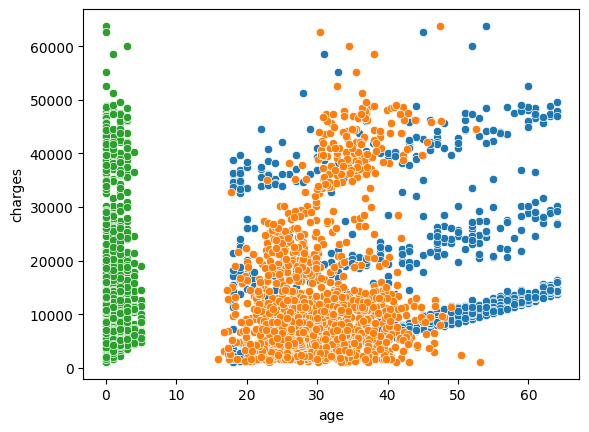

In [16]:
sns.scatterplot(x='age', y='charges', data=df)
sns.scatterplot(x='bmi', y='charges', data=df)
sns.scatterplot(x='children', y='charges', data=df)
plt.show()

It also has outliers

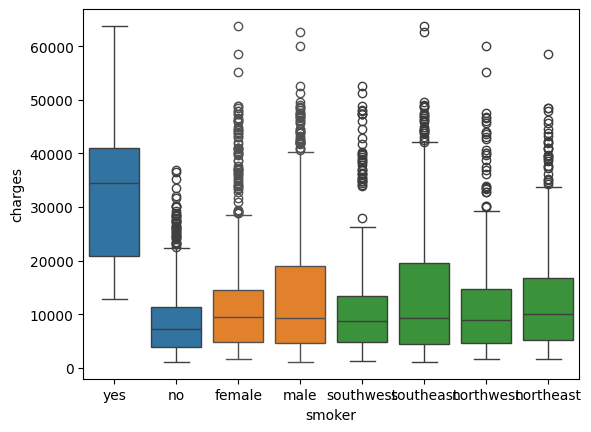

In [17]:
sns.boxplot(x='smoker', y='charges', data=df)
sns.boxplot(x='sex', y='charges', data=df)
sns.boxplot(x='region', y='charges', data=df)
plt.show()

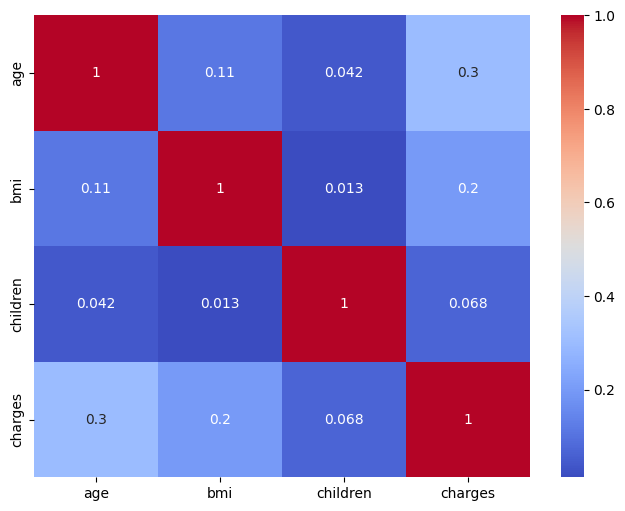

In [51]:
# The age has highr relation to our target charges
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
X = df.drop('charges',axis=1)
y = df['charges']

In [20]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
df['sex'] = df['sex'].astype('category')
df['region'] = df['region'].astype('category')
df['smoker'] = df['smoker'].astype('category')

In [22]:
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [23]:
display(df.isnull().sum())

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [24]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [25]:
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 1337


In [26]:
df.drop('children', axis=1, inplace=True)


In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'charges'], dtype='object')

In [28]:
df.shape

(1337, 6)

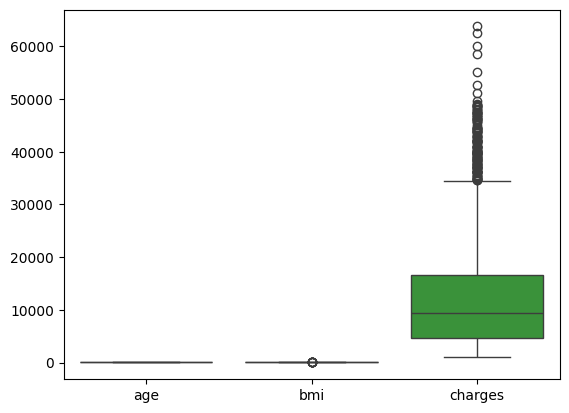

In [29]:
sns.boxplot(data=df[['age','bmi','charges']])
plt.show()

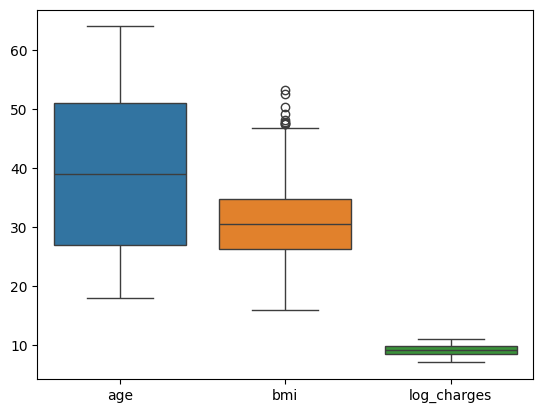

In [31]:
import numpy as np
df['log_charges'] = np.log1p(df['charges'])
df['log_bmi'] = np.log1p(df['bmi'])

sns.boxplot(data=df[['age','bmi','log_charges']])
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
# Redefine y after dropping duplicates
y = df_encoded_direct['charges']
X_encoded = df_encoded_direct.drop('charges', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [40]:
# WARNING: This modifies the original df DataFrame
df_encoded_direct = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

display(df_encoded_direct.head())
display(df_encoded_direct.dtypes)

,age,bmi,charges,log_charges,log_bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,9.734236,3.363842,False,True,False,False,True
1,18,33.770,1725.55230,7.453882,3.548755,True,False,False,True,False
2,28,33.000,4449.46200,8.400763,3.526361,True,False,False,True,False
3,33,22.705,21984.47061,9.998137,3.165686,True,False,True,False,False
4,32,28.880,3866.85520,8.260455,3.397189,True,False,True,False,False


,0
age,int64
bmi,float64
charges,float64
log_charges,float64
log_bmi,float64
sex_male,bool
smoker_yes,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform on the test set

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test_scaled)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 21603189.50
Mean Absolute Error (MAE): 3214.19
Root Mean Squared Error (RMSE): 4647.92
R-squared (R2) Score: 0.88
